# Anomaly detection with Machine Learning (ML)

## credit card Fraud detection

- https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
- https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html

In [1]:
import pandas as pd
import numpy as np
import os, sys, warnings
from tqdm import tqdm

In [2]:
sys.path.insert(0,'..')  ## add parent folder to path
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 200

In [3]:
from helpers import load_dataset

In [4]:
data = load_dataset(name='creditcard')
data.head()

c:\Users\dherrera\OneDrive - COOSALUD EPS-S\PERSONAL\LearnigDS-ML\Anomaly detection
(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  fl

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [5]:
target = "Class"
cols = [c for c in data if c.startswith('V')]
print(f"Target: {target}")
print(f"Feature: {','.join(cols)}")

Target: Class
Feature: V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28


### EDA

- 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset
- 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning
- 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwis

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,"284,807.00","94,813.86","47,488.15",0.00,"54,201.50","84,692.00","139,320.50","172,792.00"
V1,"284,807.00",0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,"284,807.00",0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,"284,807.00",-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,"284,807.00",0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,"284,807.00",0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,"284,807.00",0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,"284,807.00",-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,"284,807.00",0.00,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,"284,807.00",-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


In [7]:
data.isnull().sum().sum()

0

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Este es un dataset desbalanceado 
pd.concat([data[target].value_counts(), data[target].value_counts(normalize=True)*100], axis=1)

,Class,Class
0,284315,99.83
1,492,0.17


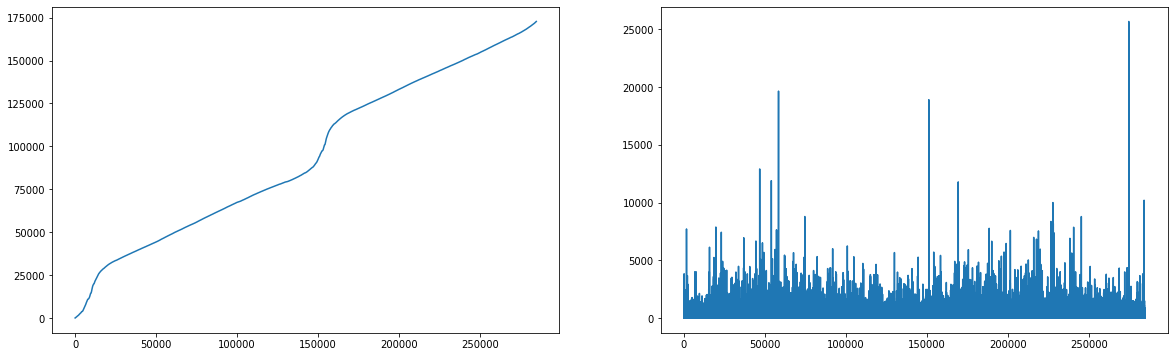

In [10]:
fig, axes = plt.subplots(1,2, figsize=(20,6))
data['Time'].plot(ax=axes[0])
data['Amount'].plot(ax=axes[1])
plt.show()


#### scale data

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
data1 = MinMaxScaler((-1,1)).fit_transform(data.drop('Class',axis=1))
data1 = pd.concat([pd.DataFrame(data1, columns=data.columns[:-1]), data['Class']], axis=1)
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.00,0.87,0.53,0.76,-0.37,0.53,-0.46,-0.47,0.57,-0.05,0.02,-0.50,0.36,-0.26,0.27,-0.11,-0.13,0.47,0.31,0.19,0.17,0.12,0.05,0.33,-0.22,0.17,-0.21,-0.16,-0.37,-0.99,0
1,-1.00,0.96,0.54,0.68,-0.46,0.53,-0.48,-0.47,0.57,-0.09,0.01,-0.24,0.49,-0.03,0.28,-0.23,-0.07,0.46,0.28,0.10,0.16,0.12,-0.04,0.33,-0.33,0.17,-0.11,-0.17,-0.37,-1.00,0
2,-1.00,0.87,0.51,0.74,-0.46,0.52,-0.44,-0.46,0.58,-0.18,0.03,-0.36,0.41,0.01,0.28,0.02,-0.29,0.53,0.29,-0.23,0.17,0.13,0.09,0.36,-0.42,0.12,-0.19,-0.17,-0.38,-0.97,0
3,-1.00,0.88,0.53,0.74,-0.57,0.53,-0.45,-0.47,0.58,-0.17,0.02,-0.46,0.42,-0.02,0.27,-0.42,-0.17,0.42,0.58,-0.07,0.16,0.12,0.02,0.33,-0.55,0.23,-0.22,-0.16,-0.37,-0.99,0
4,-1.00,0.88,0.55,0.73,-0.46,0.53,-0.47,-0.46,0.56,-0.02,0.05,-0.53,0.45,0.11,0.22,-0.30,-0.13,0.45,0.30,0.25,0.17,0.12,0.09,0.33,-0.20,0.13,0.01,-0.16,-0.37,-0.99,0


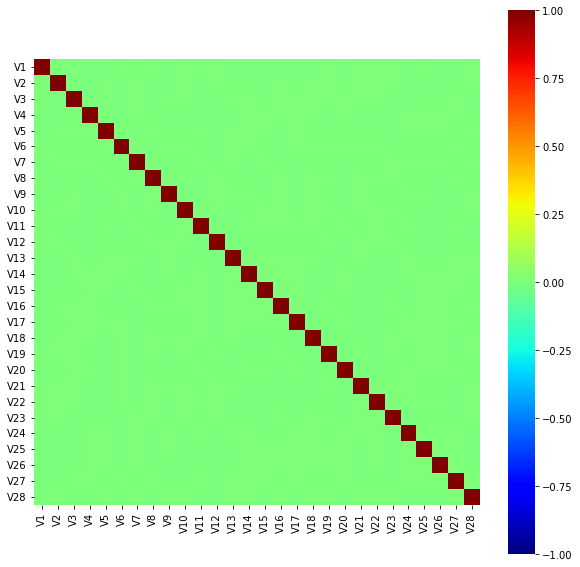

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data1[cols].corr(), cmap='jet', square=True, vmin=-1, vmax=1)
plt.show()

#### distributions

In [14]:
def make_plot_distribution(df, target):
    import matplotlib.gridspec as gridspec

    columns = df.drop(target, axis=1).columns
    
    grid = gridspec.GridSpec(6, 5)

    plt.figure(figsize=(20,20))

    for n, col in enumerate(df[columns]):
        ax = plt.subplot(grid[n])
        sns.distplot(df[df[target]==1][col], bins = 50, color='g')
        sns.distplot(df[df[target]==0][col], bins = 50, color='r') 
        ax.set_ylabel('Density')
        ax.set_title(str(col))
        ax.set_xlabel('')
    plt.tight_layout()
    plt.show()

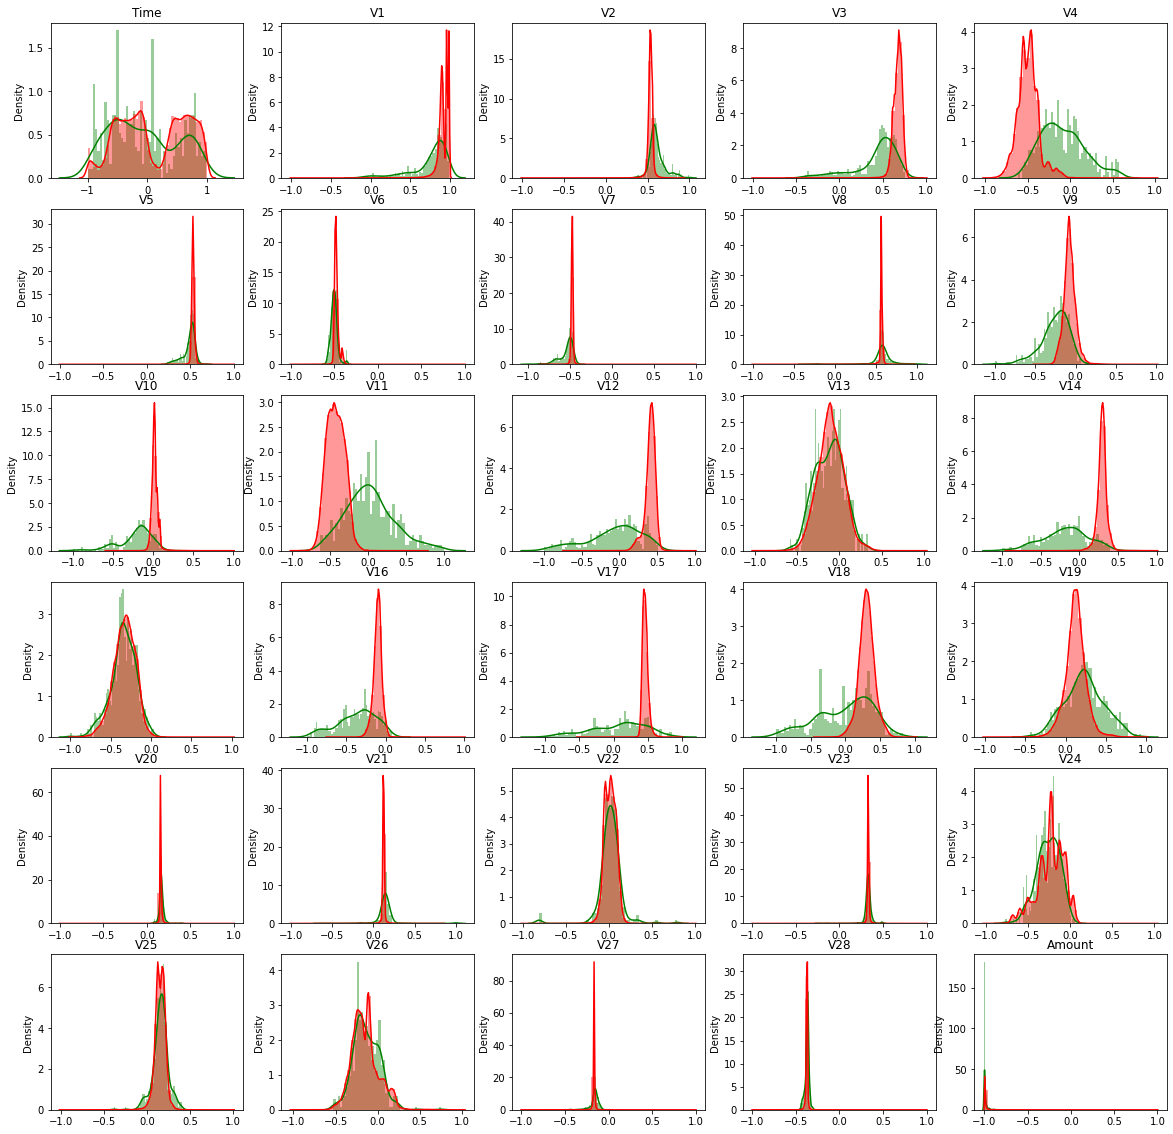

In [15]:
make_plot_distribution(df=data1, target=target)

### outliers

In [122]:
def make_plot_boxplot(df, target):
    import matplotlib.gridspec as gridspec

    columns = df.drop(target, axis=1).columns
    grid = gridspec.GridSpec(7, 10)

    plt.figure(figsize=(20,20))

    for n, col in enumerate(df[columns]):
        ax = plt.subplot(grid[n])
        sns.boxplot(data=data1, x=target, y=col)
        # ax.set_ylabel('Density')
        ax.set_title(str(col))
        ax.set_xlabel('')
        ax.set_ylabel('')
    plt.tight_layout()
    plt.show()

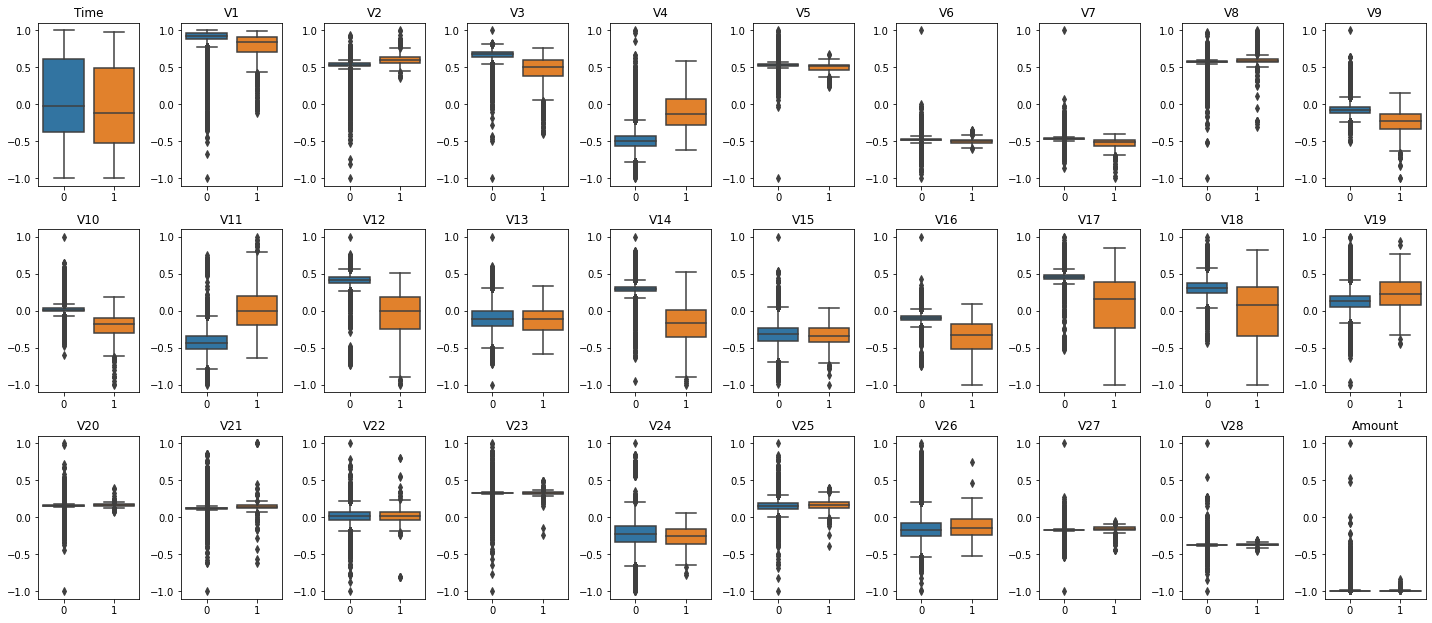

In [123]:
make_plot_boxplot(df=data1, target=target)

Text(0.5, 1.0, 'Correlation With Class')

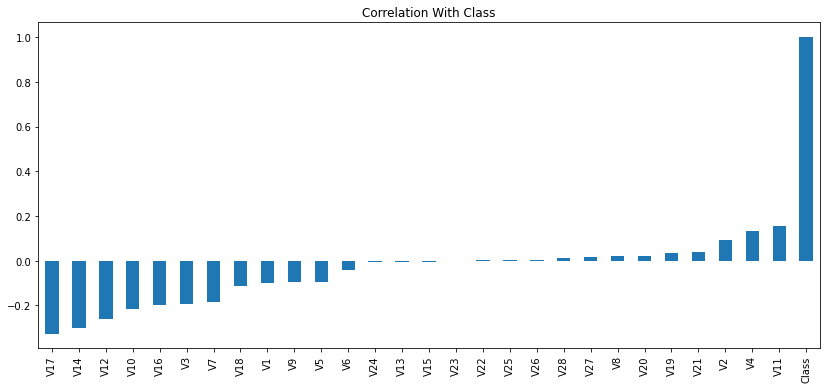

In [18]:
plt.figure(figsize = (14,6))
data1[cols+[target]].corr()['Class'].sort_values().plot(kind = 'bar')
plt.title('Correlation With Class')

# Models

In [19]:
from sklearn.model_selection import train_test_split

### split train test

In [20]:
X = data1[cols].values
y = data1[target].values
X.shape, y.shape

((284807, 28), (284807,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
                                                        X, y
                                                        , test_size = 0.2
                                                        , random_state=123
                                                        , stratify=y        # La distribucion de y se mantiene en el split
                                                    )
print(f"X_train={X_train.shape}, X_test={X_test.shape}, y_train={y_train.shape}, y_test={y_test.shape}")
# print("y\n",pd.concat([pd.DataFrame(y).value_counts(), pd.DataFrame(y).value_counts(normalize=True)*100],axis=1))
# print("\ny_train\n",pd.concat([pd.DataFrame(y_train).value_counts(), pd.DataFrame(y_train).value_counts(normalize=True)*100],axis=1))
# print("\ny_test\n",pd.concat([pd.DataFrame(y_test).value_counts(), pd.DataFrame(y_test).value_counts(normalize=True)*100],axis=1))

X_train=(227845, 28), X_test=(56962, 28), y_train=(227845,), y_test=(56962,)


### Classifiers

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [23]:
def run_model(m, X_train, y_train, X_test, y_test):

    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, average_precision_score, roc_auc_score, recall_score, precision_recall_curve, classification_report

    # print(m)
    try:
        clf = eval(f"{m}(random_state=123)")
    except:
        clf = eval(f'{m}()')
    clf.fit(X=X_train, y=y_train)
    y_pred = clf.predict(X_test)
    res = {
            "model": clf
            , "y_pred": y_pred
            , "accuracy_score": accuracy_score(y_test,y_pred)
            , "confusion_matrix": confusion_matrix(y_test,y_pred)
            , "precision": precision_score(y_test,y_pred)
            , "recall_score": recall_score(y_test,y_pred)
            , "classification_report": classification_report(y_test,y_pred, output_dict=True)
        }
    return res

In [24]:
models = dict()
models_2_run = ['LogisticRegression','KNeighborsClassifier','RandomForestClassifier','XGBClassifier']
for m in tqdm(models_2_run, total=len(models_2_run)):
    models[m] = run_model(m, X_train, y_train, X_test, y_test)

100%|██████████| 4/4 [04:03<00:00, 60.95s/it]


In [25]:
pd.DataFrame(models).T

,model,y_pred,accuracy_score,confusion_matrix,precision,recall_score,classification_report
LogisticRegression,LogisticRegression(random_state=123),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.00,"[[56856, 8], [45, 53]]",0.87,0.54,"{'0': {'precision': 0.9992091527389677, 'recal..."
KNeighborsClassifier,KNeighborsClassifier(),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.00,"[[56856, 8], [30, 68]]",0.89,0.69,"{'0': {'precision': 0.9994726294694652, 'recal..."
RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.00,"[[56857, 7], [32, 66]]",0.90,0.67,"{'0': {'precision': 0.9994375010986307, 'recal..."
XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.00,"[[56857, 7], [27, 71]]",0.91,0.72,"{'0': {'precision': 0.9995253498347514, 'recal..."


## Que metrica usar para un dataset imbalanceado

https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/

- TP / (TP + FN)
- Es decir, el modelo sólo es capaz de identificar un 25% de los clientes que estarían interesados en adquirir el producto. Esto significa que el modelo del ejemplo sólo es capaz de identificar 1 de cada 4 de los clientes que sí aceptarían la oferta.


In [26]:
report = pd.concat([pd.DataFrame(v['classification_report']).T.assign(model=k) for k,v in models.items()]).reset_index()
report = report[['model']+list(report.columns)[:-1]].rename(columns={"index": "metric"})
report

,model,metric,precision,recall,f1-score,support
0,LogisticRegression,0,1.00,1.00,1.00,"56,864.00"
1,LogisticRegression,1,0.87,0.54,0.67,98.00
2,LogisticRegression,accuracy,1.00,1.00,1.00,1.00
3,LogisticRegression,macro avg,0.93,0.77,0.83,"56,962.00"
4,LogisticRegression,weighted avg,1.00,1.00,1.00,"56,962.00"
5,KNeighborsClassifier,0,1.00,1.00,1.00,"56,864.00"
6,KNeighborsClassifier,1,0.89,0.69,0.78,98.00
7,KNeighborsClassifier,accuracy,1.00,1.00,1.00,1.00
8,KNeighborsClassifier,macro avg,0.95,0.85,0.89,"56,962.00"
9,KNeighborsClassifier,weighted avg,1.00,1.00,1.00,"56,962.00"


In [27]:
print("Comparando desempeño de los algoritmos con respecto a clasificar los que realmente son fraude")
print("ver RECALL")
report[report['metric'].isin(['1'])] ## '0',

Comparando desempeño de los algoritmos con respecto a clasificar los que realmente son fraude
ver RECALL


,model,metric,precision,recall,f1-score,support
1,LogisticRegression,1,0.87,0.54,0.67,98.00
6,KNeighborsClassifier,1,0.89,0.69,0.78,98.00
11,RandomForestClassifier,1,0.90,0.67,0.77,98.00
16,XGBClassifier,1,0.91,0.72,0.81,98.00


# UnSupervised

- https://www.kaggle.com/code/drscarlat/compare-6-unsupervised-anomaly-detection-models
- https://www.kaggle.com/code/rgaddati/unsupervised-fraud-detection-isolation-forest


In [28]:
dist_class = pd.concat([data1[target].value_counts(), data1[target].value_counts(normalize=True)*100], axis=1)
dist_class.columns = ["Class","% Class"]
dist_class

,Class,% Class
0,284315,99.83
1,492,0.17


In [29]:
# split data without Fraud
# Create train test, fraud data is only in test
filtro = data1[target]==0
normal_data = data1[filtro].copy()
fraud_data  = data1[~filtro].copy()
print(f"Distribucion normal {dict(data1[target].value_counts())}")
print(f"Distribucion normal_data = {normal_data.shape}")
print(f"Distribucion fraud_data  = {fraud_data.shape}")

Distribucion normal {0: 284315, 1: 492}
Distribucion normal_data = (284315, 31)
Distribucion fraud_data  = (492, 31)


In [30]:
## making: TRAIN - TEST
suffle_data = normal_data.sample(frac=1, random_state=123)[cols]
num_test = int(len(suffle_data)*0.25)   ## % de datos para test
X_train = suffle_data[:-num_test].copy()
X_test = suffle_data[-num_test:].copy()
y_test = np.concatenate([np.zeros(len(X_test)), np.ones(len(fraud_data))])
X_test = pd.concat([X_test, fraud_data[cols]])    ## append True Fraud
y_train = np.zeros(len(X_train))
print(f"X_train={X_train.shape}, y_train={y_train.shape}, X_test={X_test.shape}, y_test={y_test.shape}")

X_train=(213237, 28), y_train=(213237,), X_test=(71570, 28), y_test=(71570,)


In [31]:
PercFraud = len(fraud_data) / len(X_test)
print(f"Porcentaje de Fraude = {round(PercFraud*100,3)}%")

Porcentaje de Fraude = 0.687%


## Local Outlier Factor

- https://towardsdatascience.com/local-outlier-factor-lof-algorithm-for-outlier-identification-8efb887d9843
- https://towardsdatascience.com/novelty-detection-with-local-outlier-factor-4867e89e4f91

##### LOF
- LOF(k) ~ 1 means Similar density as neighbors.
- LOF(k) < 1 means Higher density than neighbors (Inlier/not an outlier).
- LOF(k) > 1 means Lower density than neighbors (Outlier)

In [32]:
from sklearn.neighbors import LocalOutlierFactor

In [33]:
clf = LocalOutlierFactor(contamination = PercFraud)
y_pred = clf.fit_predict(X_test)
print(dict(pd.DataFrame(y_pred).value_counts()))
y_pred = pd.DataFrame(y_pred).replace({1:0,-1:1})[0].values
# y_pred
n_errors = (y_pred != y_test).sum()
X_scores = clf.negative_outlier_factor_


{(1,): 71078, (-1,): 492}


In [34]:
print(dict(pd.DataFrame(y_test).value_counts()))
print(dict(pd.DataFrame(y_pred).value_counts()))

{(0.0,): 71078, (1.0,): 492}
{(0,): 71078, (1,): 492}


In [109]:
def plot_X_ytest_ypred(X_test, y_test, y_pred):
    import matplotlib.gridspec as gridspec

    columns = X_test.columns
    cols = 3
    rows = int(np.ceil(len(columns)/cols))
    grid = gridspec.GridSpec(rows, cols)

    plt.figure(figsize=(rows*2,rows*3))

    for n, c in enumerate(columns):
        ax = plt.subplot(grid[n])
        sns.scatterplot(x=X_test.index, y=X_test[c], alpha=0.5, ax=ax, label='test_data')
        pos_pred = [i for i,x in enumerate(y_pred) if x==1]
        pos_test = [i for i,x in enumerate(y_test) if x==1]
        sns.scatterplot(x=X_test.iloc[pos_pred].index, y=X_test.iloc[pos_pred][c], color='orange', alpha=0.7, ax=ax, label='pos_pred')
        sns.scatterplot(x=X_test.iloc[pos_test].index, y=X_test.iloc[pos_test][c], color='r', s=10, ax=ax, label='pos_test')
        # sns.scatterplot(x=X_test.iloc[pos].index, y=X_test.iloc[pos][c], alpha=0.7, color='r', ax=ax)
        ax.set_title(str(c))
        ax.set_xlabel('')
        ax.set_ylabel('')
        if n>0:
            plt.legend('')
    plt.tight_layout()
    plt.show()

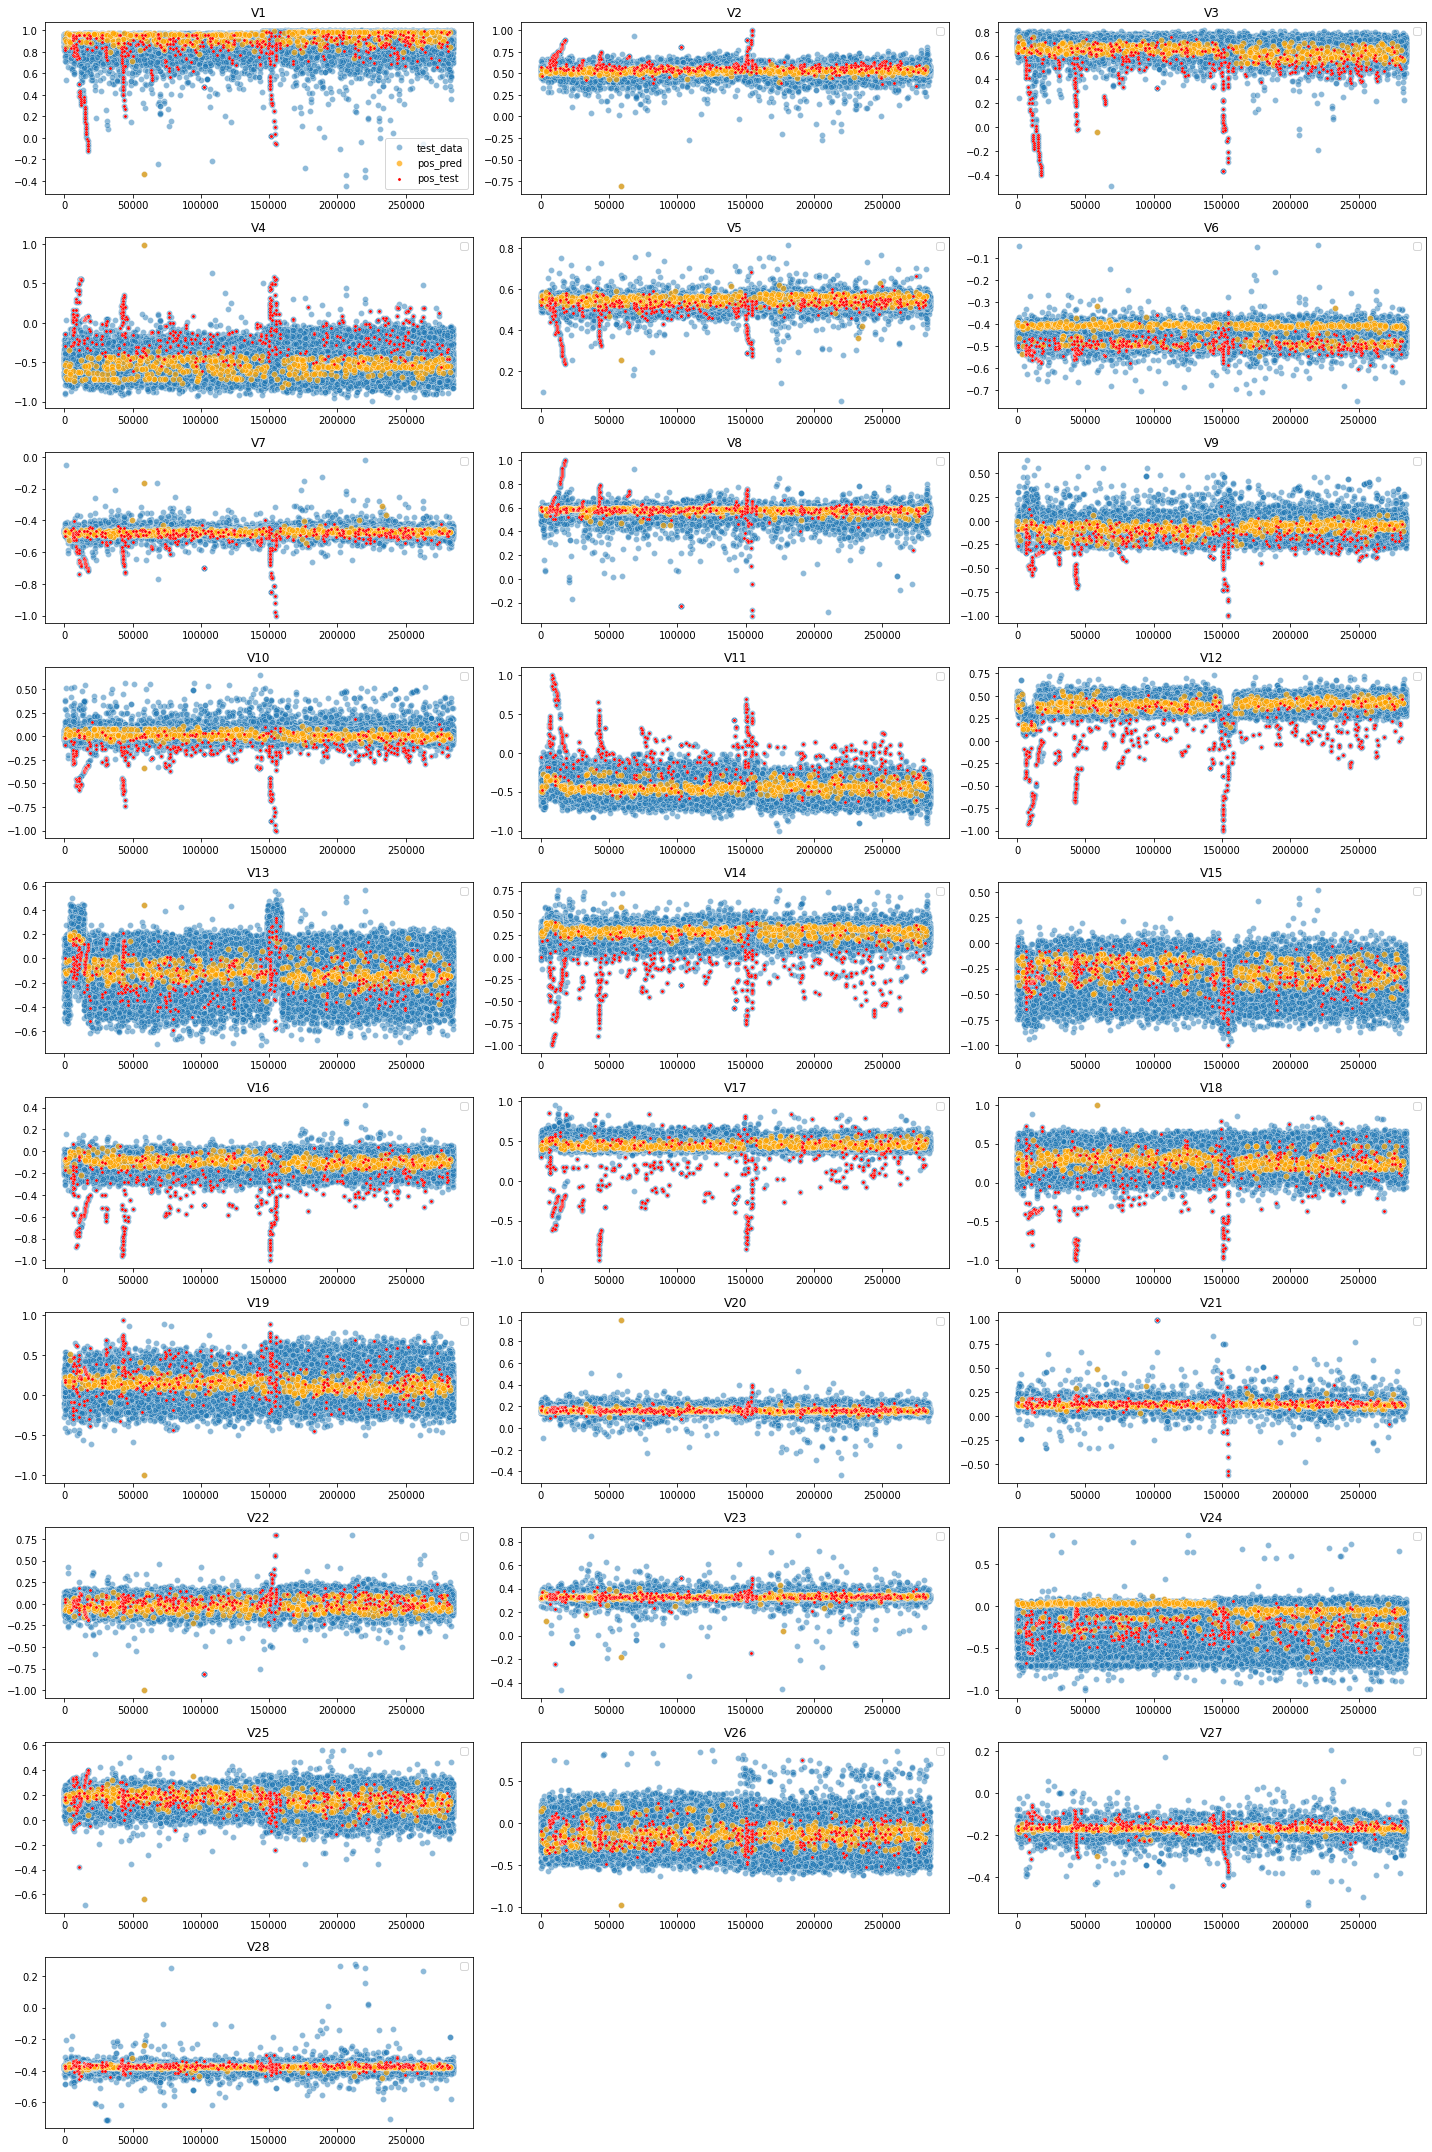

In [110]:
plot_X_ytest_ypred(X_test, y_test, y_pred)

In [121]:
X_ = pd.concat([X_test, pd.DataFrame([y_test, y_pred]).T.set_index(X_test.index)],axis=1).rename(columns={0:"y_test", 1:"y_pred"})
X_.groupby(["y_test","y_pred"], dropna=False).size()
pd.crosstab(X_["y_test"],X_["y_pred"])

y_pred,0.00,1.00
y_test,,
0.00,70587,491
1.00,491,1


## IsolationForest

In [128]:
from sklearn.ensemble import IsolationForest

In [129]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
231808,0.91,0.54,0.61,-0.58,0.56,-0.45,-0.44,0.57,-0.13,-0.01,-0.36,0.42,-0.26,0.37,-0.37,-0.19,0.47,0.19,0.02,0.16,0.14,0.15,0.33,-0.48,0.22,-0.11,-0.17,-0.38
89517,0.91,0.55,0.72,-0.34,0.52,-0.45,-0.49,0.52,-0.06,-0.02,-0.54,0.46,-0.20,0.30,-0.37,-0.17,0.52,0.21,0.20,0.17,0.08,0.07,0.33,-0.21,0.25,-0.17,-0.16,-0.36
37955,0.95,0.54,0.71,-0.26,0.53,-0.47,-0.47,0.57,-0.10,0.04,-0.49,0.46,-0.00,0.28,-0.40,-0.10,0.46,0.14,-0.02,0.16,0.12,-0.03,0.33,-0.21,0.19,-0.20,-0.17,-0.37
280069,0.89,0.57,0.66,-0.34,0.59,-0.39,-0.45,0.58,-0.24,0.07,-0.49,0.34,-0.19,0.32,-0.44,-0.11,0.43,0.21,-0.03,0.16,0.12,0.04,0.31,-0.04,0.29,-0.03,-0.17,-0.38
69773,0.94,0.53,0.66,-0.39,0.54,-0.47,-0.46,0.57,-0.11,-0.00,-0.17,0.49,-0.06,0.26,-0.23,-0.11,0.51,0.27,-0.02,0.17,0.13,0.03,0.32,-0.33,0.21,-0.26,-0.17,-0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,0.85,0.56,0.52,-0.34,0.51,-0.51,-0.48,0.59,-0.22,-0.21,-0.18,0.00,-0.29,-0.16,-0.27,-0.29,0.20,0.13,0.19,0.19,0.15,-0.01,0.35,-0.32,0.22,0.11,-0.16,-0.37
280143,0.96,0.56,0.50,-0.37,0.54,-0.50,-0.49,0.58,-0.15,-0.12,-0.09,0.17,-0.23,-0.06,-0.42,-0.24,0.27,0.21,0.24,0.17,0.13,0.02,0.33,-0.26,0.21,0.09,-0.15,-0.37
280149,0.89,0.56,0.60,-0.45,0.52,-0.47,-0.50,0.60,-0.12,-0.13,-0.22,0.20,-0.17,0.02,-0.43,-0.20,0.17,0.24,0.17,0.17,0.15,0.10,0.34,-0.23,0.07,0.00,-0.15,-0.37
281144,0.81,0.55,0.49,-0.34,0.52,-0.53,-0.50,0.59,-0.19,-0.20,-0.20,0.03,-0.28,-0.14,-0.31,-0.26,0.19,0.10,0.12,0.17,0.14,-0.01,0.32,-0.29,0.12,0.05,-0.13,-0.38


In [157]:
ISF = IsolationForest(random_state=123)
ISF.fit(normal_data)
normal_isf = ISF.predict(normal_data)
fraud_isf = ISF.predict(fraud_data)

In [158]:
LOF = LocalOutlierFactor(novelty=True)
LOF.fit(normal_data)
normal_lof = LOF.predict(normal_data)
fraud_lof = LOF.predict(fraud_data)

C:\Users\dherrera\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\dherrera\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [159]:
def calc_accuracy(normal, fraud):
    return {0: len(normal[normal==1])/len(normal), 1: len(fraud[fraud==-1])/len(fraud)}

In [160]:
print(f"ACC IsolationForest:    {calc_accuracy(normal_isf,fraud_isf)}")
print(f"ACC LocalOutlierFactor: {calc_accuracy(normal_lof,fraud_lof)}")

ACC IsolationForest:    {0: 0.9628334769533792, 1: 0.8150406504065041}
ACC LocalOutlierFactor: {0: 0.9579480505777043, 1: 0.9349593495934959}


In [156]:
values = normal_isf
tp=list(values).count(1)
tp

273748

In [137]:
values.shape[0]


284315

In [ ]:
accuracy=np.round(tp/total,4)

In [ ]:

in_accuracy_isf=normal_accuracy(normal_isf)
out_accuracy_isf=fraud_accuracy(fraud_isf)
print("Accuracy in Detecting Normal Cases:", in_accuracy_isf)
print("Accuracy in Detecting Fraud Cases:", out_accuracy_isf)

